https://twitter.com/wasisama/status/1401804568468484099


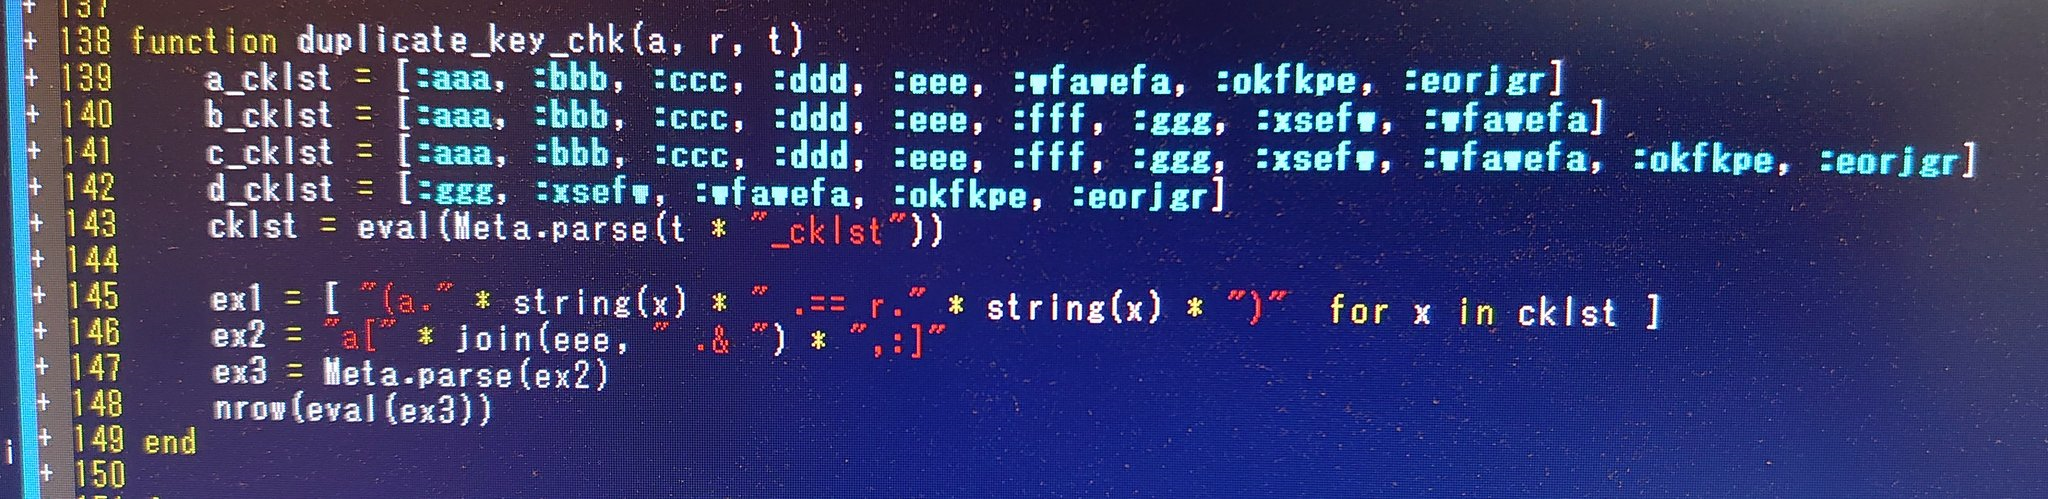

In [1]:
using MyUtils: showimg
showimg("image/png", "E3Q1019VoAEZfmL.png")

Don't use Meta.parse!

See [How to warn new users away from metaprogramming](https://discourse.julialang.org/t/how-to-warn-new-users-away-from-metaprogramming/35022).

In [2]:
function equalrows(a, r, names = propertynames(a))
    a[.&((getproperty(a, n) .== getproperty(r, n) for n in names)...), :]
end

equalrows (generic function with 2 methods)

In [3]:
using DataFrames

names = [:index, :aaa, :bbb, :ccc, :ddd, :eee, :wfawefa, :okfkpe, :eorjgr]

data_a = Vector[[collect(1:10)]; [rand(10) for _ in 2:length(names)]]
data_r = deepcopy(data_a)
data_a[2][1:2:10] .= -1.0
data_a[7][1:3:10] .= -2.0

a = DataFrame(data_a, names)
r = DataFrame(data_r, names);

In [4]:
a

,index,aaa,bbb,ccc,ddd,eee,wfawefa,okfkpe
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,-1.0,0.166269,0.626898,0.25328,0.226269,-2.0,0.0017148
2,2,0.760351,0.332301,0.966567,0.582317,0.0487471,0.741904,0.631223
3,3,-1.0,0.507095,0.441515,0.249806,0.92918,0.66507,0.69294
4,4,0.869625,0.465965,0.122215,0.0108863,0.768624,-2.0,0.826068
5,5,-1.0,0.720105,0.966122,0.954652,0.146627,0.574906,0.304826
6,6,0.0471101,0.97028,0.623313,0.648032,0.841358,0.947996,0.867679
7,7,-1.0,0.455712,0.82649,0.92249,0.0320897,-2.0,0.729911
8,8,0.609646,0.694654,0.121539,0.0838426,0.583753,0.99944,0.352498
9,9,-1.0,0.00808787,0.0481011,0.863778,0.999736,0.547296,0.673785


In [5]:
r

,index,aaa,bbb,ccc,ddd,eee,wfawefa,okfkpe
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,0.349011,0.166269,0.626898,0.25328,0.226269,0.944333,0.0017148
2,2,0.760351,0.332301,0.966567,0.582317,0.0487471,0.741904,0.631223
3,3,0.988318,0.507095,0.441515,0.249806,0.92918,0.66507,0.69294
4,4,0.869625,0.465965,0.122215,0.0108863,0.768624,0.490654,0.826068
5,5,0.954366,0.720105,0.966122,0.954652,0.146627,0.574906,0.304826
6,6,0.0471101,0.97028,0.623313,0.648032,0.841358,0.947996,0.867679
7,7,0.0794873,0.455712,0.82649,0.92249,0.0320897,0.99905,0.729911
8,8,0.609646,0.694654,0.121539,0.0838426,0.583753,0.99944,0.352498
9,9,0.51871,0.00808787,0.0481011,0.863778,0.999736,0.547296,0.673785


In [6]:
@show names
equalrows(a, r)

names = [:index, :aaa, :bbb, :ccc, :ddd, :eee, :wfawefa, :okfkpe, :eorjgr]


,index,aaa,bbb,ccc,ddd,eee,wfawefa,okfkpe
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2,0.760351,0.332301,0.966567,0.582317,0.0487471,0.741904,0.631223
2,6,0.0471101,0.97028,0.623313,0.648032,0.841358,0.947996,0.867679
3,8,0.609646,0.694654,0.121539,0.0838426,0.583753,0.99944,0.352498


In [7]:
@show names_aaa_to_eee = [:aaa, :bbb, :ccc, :ddd, :eee]
equalrows(a, r, names_aaa_to_eee)

names_aaa_to_eee = [:aaa, :bbb, :ccc, :ddd, :eee] = [:aaa, :bbb, :ccc, :ddd, :eee]


,index,aaa,bbb,ccc,ddd,eee,wfawefa,okfkpe
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2,0.760351,0.332301,0.966567,0.582317,0.0487471,0.741904,0.631223
2,4,0.869625,0.465965,0.122215,0.0108863,0.768624,-2.0,0.826068
3,6,0.0471101,0.97028,0.623313,0.648032,0.841358,0.947996,0.867679
4,8,0.609646,0.694654,0.121539,0.0838426,0.583753,0.99944,0.352498
5,10,0.839614,0.221351,0.637742,0.643859,0.558865,-2.0,0.245409


In [8]:
@show names_last_3 = [:wfawefa, :okfkpe, :eorjgr]
equalrows(a, r, names_last_3)

names_last_3 = [:wfawefa, :okfkpe, :eorjgr] = [:wfawefa, :okfkpe, :eorjgr]


,index,aaa,bbb,ccc,ddd,eee,wfawefa,okfkpe
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2,0.760351,0.332301,0.966567,0.582317,0.0487471,0.741904,0.631223
2,3,-1.0,0.507095,0.441515,0.249806,0.92918,0.66507,0.69294
3,5,-1.0,0.720105,0.966122,0.954652,0.146627,0.574906,0.304826
4,6,0.0471101,0.97028,0.623313,0.648032,0.841358,0.947996,0.867679
5,8,0.609646,0.694654,0.121539,0.0838426,0.583753,0.99944,0.352498
6,9,-1.0,0.00808787,0.0481011,0.863778,0.999736,0.547296,0.673785
